<a href="_index.ipynb">&larr; FIL </a>&loz;
<a href="../../README.md"> &uarr; TOC &uarr; </a>
<img src='../_img/icon.svg' align='right' width='10%'></img>
# Amplitudengang linearphasiger Filter
 
Demonstriere Einfluss von einfachen und doppelten Nullstellen im SB und DB, zu Übungsaufgabe "Amplitudengang linearphasiger Filter"

In [1]:
import numpy as np
import scipy.signal as sig
%matplotlib inline
import matplotlib.pyplot as plt
figsize = {"figsize":(10,5)}

In [2]:
f_S = 1
bb = [-1/8, 0, 5/8, 1, 5/8, 0, -1/8]
aa = 1

z_0 = np.roots(bb) # Wurzeln des Polynoms, 

print(' i |  z_0,i          | (polar)')   
print('------------------------------------------------')
for i in range(len(z_0)):
    print('{0:2d} | {1:15.4f} |{2:6.3f} * e^(j {3:6.4f} pi) '\
    .format(i, z_0[i],abs(z_0[i]), np.angle(z_0[i])/np.pi))  

for i in range(len(z_0)):
    if z_0[i].real > 0: # Entferne Nullstellen im Durchlassband
        z_0[i] = 0
        
bb_neu = np.poly(z_0) # "Ausmultiplizieren" der Koeffizienten

[w, H_org] = sig.freqz(bb, aa, 1024)
[w, H_neu] = sig.freqz(bb_neu, aa, 1024)
f = w / (2 * np.pi) * f_S

 i |  z_0,i          | (polar)
------------------------------------------------
 0 |  2.8901+0.0000j | 2.890 * e^(j 0.0000 pi) 
 1 | -0.6180+0.7862j | 1.000 * e^(j 0.7121 pi) 
 2 | -0.6180-0.7862j | 1.000 * e^(j -0.7121 pi) 
 3 | -1.0000+0.0000j | 1.000 * e^(j 1.0000 pi) 
 4 | -1.0000-0.0000j | 1.000 * e^(j -1.0000 pi) 
 5 |  0.3460+0.0000j | 0.346 * e^(j 0.0000 pi) 


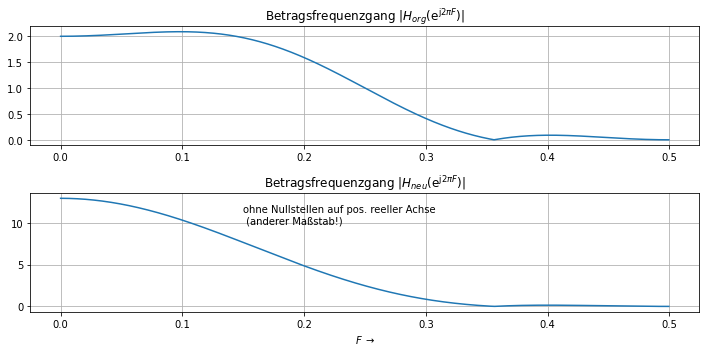

In [3]:
fig1, (ax1, ax2) = plt.subplots(2, **figsize)
ax1.plot(f, abs(H_org)); ax1.grid(True)
ax1.set_title(r'Betragsfrequenzgang $|H_{org}(\mathrm{e}^{\mathrm{j} 2 \pi F})|$')
ax2.plot(f,abs(H_neu)); ax2.grid(True)
ax2.text( 0.15,11, "ohne Nullstellen auf pos. reeller Achse\n (anderer Maßstab!)", va="center", ha="left")
ax2.set_title(r'Betragsfrequenzgang $|H_{neu}(\mathrm{e}^{\mathrm{j} 2 \pi F})|$')
ax2.set_xlabel(r'$F \; \rightarrow$')
fig1.tight_layout();

Mit automatischer Beschriftung sieht der Code so aus:

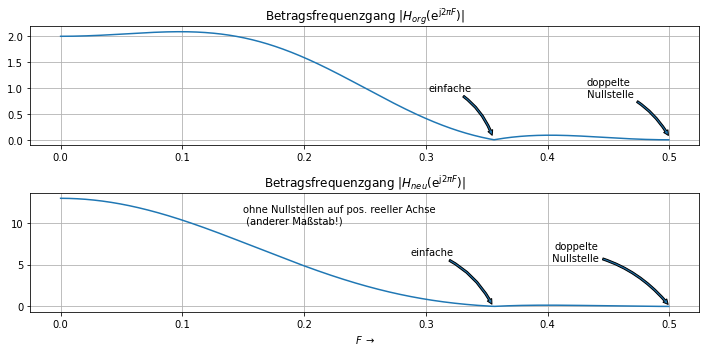

In [4]:
fig1, (ax1, ax2) = plt.subplots(2, **figsize)
ax1.plot(f, abs(H_org)); ax1.grid(True)
ax1.set_title(r'Betragsfrequenzgang $|H_{org}(\mathrm{e}^{\mathrm{j} 2 \pi F})|$')
ax2.plot(f,abs(H_neu)); ax2.grid(True)
ax2.set_title(r'Betragsfrequenzgang $|H_{neu}(\mathrm{e}^{\mathrm{j} 2 \pi F})|$')
ax2.set_xlabel(r'$F \; \rightarrow$')

ax1.annotate("einfache",
            xy=(0.355, 0.05), xycoords='data',
            xytext=(0.32, 1.0), textcoords='data',
            va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2"),
                            )
ax1.annotate("doppelte\n Nullstelle",
            xy=(0.5, 0.05), xycoords='data',
            xytext=(0.45, 1.0), textcoords='data',
            va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2"),
                            )
ax2.text( 0.15,11, "ohne Nullstellen auf pos. reeller Achse\n (anderer Maßstab!)", 
            va="center", ha="left")
ax2.annotate("einfache",
            xy=(0.355, 0.05), xycoords='data',
            xytext=(0.6, 0.5), textcoords='axes fraction',
            va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2"),
                            )
ax2.annotate("doppelte\n Nullstelle",
            xy=(0.5, 0.05), xycoords='data',
            xytext=(0.85, 0.5), textcoords='axes fraction',
            va="center", ha="right",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2"),
                            )
# try 'figure fraction','axes points', 'offset points', ...             
ax2.set_title(r'Betragsfrequenzgang $|H_{neu}(\mathrm{e}^{\mathrm{j} 2 \pi F})|$')
ax2.set_xlabel(r'$F \; \rightarrow$')
fig1.tight_layout();

***
### Copyright

(c) 2016 - 2021 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp.

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing - Vorlesungsunterlagen mit Simulationsbeispielen, 2021*.